### Data Analysis

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import os
from scipy.stats import linregress



In [3]:
# Import CSV file exports from cleaning notebook to Pandas Dataframe

co2_country_df = pd.read_csv("output-data/cleaned-data/co2-emissions-countries-cleaned.csv")
co2_gdp_merge_df = pd.read_csv("output-data/cleaned-data/co2-gdp-2016-merge.csv")
bric_merge_df = pd.read_csv("output-data/cleaned-data/bric-merge-data.csv")
us_merge_df = pd.read_csv("output-data/cleaned-data/us-states-merge.csv")


In [4]:
# Define function to run linear regression.
def lin_regress(independent, dependent): 
    
    # Use scipy to calculate values for regression
    mask = ~np.isnan(independent) & ~np.isnan(dependent)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(independent[mask], dependent[mask])
    # Calculate the regression values
    regress_vals = independent*slope + intercept

    # Create string variable that holds the regression line's equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot scatter and regression line on top of scatter plot
    plt.scatter(independent, dependent, edgecolors = "black")
    plt.plot(independent, regress_vals, color = "r", label = line_eq)
    plt.legend(loc = "best")
    print(f"The correlation coefficient is {round(rvalue, 2)}")
    print(f"The r-squared value is {round(rvalue**2,2)}")

In [11]:
# Define function to run linear regression when the slope is very small.
def lin_regress_small(independent, dependent): 
    
    # Use scipy to calculate values for regression
    mask = ~np.isnan(independent) & ~np.isnan(dependent)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(independent[mask], dependent[mask])
    # Calculate the regression values
    regress_vals = independent*slope + intercept
    slope_string = f"{round(slope*(10**9), 2)}*(10e-9)"

    # Create string variable that holds the regression line's equation
    line_eq = f"y = {slope_string}x + {round(intercept, 2)}"

    # Plot scatter and regression line on top of scatter plot
    plt.scatter(independent, dependent, edgecolors = "black")
    plt.plot(independent, regress_vals, color = "r", label = line_eq)
    plt.legend(loc = "best")
    print(f"The correlation coefficient is {round(rvalue, 2)}")
    print(f"The r-squared value is {round(rvalue**2,2)}")

The correlation coefficient is 0.09
The r-squared value is 0.01


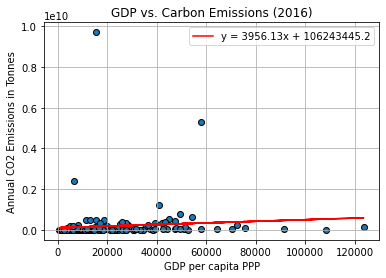

In [6]:
lin_regress(co2_gdp_merge_df.gdp_2016, co2_gdp_merge_df.annual_co2_tonnes)

plt.title("GDP vs. Carbon Emissions (2016)")
plt.xlabel("GDP per capita PPP")
plt.ylabel("Annual CO2 Emissions in Tonnes")
plt.grid(True)
plt.savefig("output-data/images/gdp-vs-co2-regression.png")
plt.show()

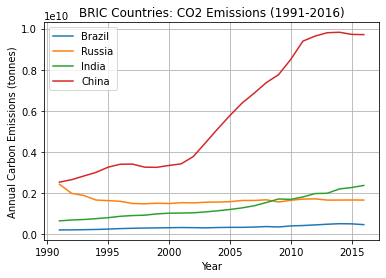

In [16]:
# Line Plot for Carbon Emmissions

# Subset data for countries
brazil_df = bric_merge_df.loc[bric_merge_df.Country == "Brazil", :]
russia_df = bric_merge_df.loc[bric_merge_df.Country == "Russia", :]
india_df = bric_merge_df.loc[bric_merge_df.Country == "India", :]
china_df = bric_merge_df.loc[bric_merge_df.Country == "China", :]

# Plotting lines
plt.plot(brazil_df.Year, brazil_df.annual_co2_tonnes, label = "Brazil")
plt.plot(russia_df.Year, russia_df.annual_co2_tonnes, label = "Russia")
plt.plot(india_df.Year, india_df.annual_co2_tonnes, label = "India")
plt.plot(china_df.Year, china_df.annual_co2_tonnes, label = "China")
plt.legend(loc = "best")
plt.title("BRIC Countries: CO2 Emissions (1991-2016)")
plt.xlabel("Year")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.grid(True)
plt.savefig("output-data/images/bric-co2-lineplot.png")
plt.show()

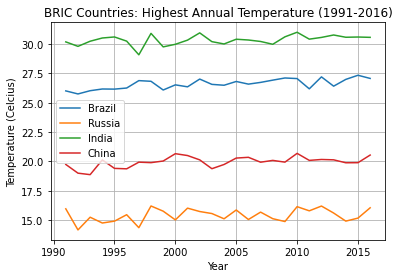

In [17]:
# Line Plot for Annual Max Temperature

# Plotting lines
plt.plot(brazil_df.Year, brazil_df.Temperature_C, label = "Brazil")
plt.plot(russia_df.Year, russia_df.Temperature_C, label = "Russia")
plt.plot(india_df.Year, india_df.Temperature_C, label = "India")
plt.plot(china_df.Year, china_df.Temperature_C, label = "China")
plt.legend(loc = "best")
plt.title("BRIC Countries: Highest Annual Temperature (1991-2016)")
plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.savefig("output-data/images/bric-temp-lineplot.png")
plt.show()

#### Linear Regression

The correlation coefficient is 0.68
The r-squared value is 0.47


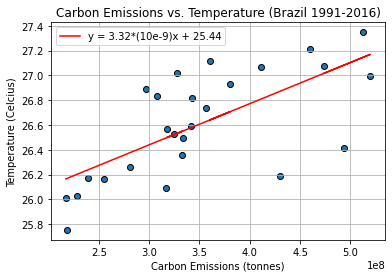

In [18]:
# Brazil
lin_regress_small(brazil_df.annual_co2_tonnes, brazil_df.Temperature_C)
plt.title("Carbon Emissions vs. Temperature (Brazil 1991-2016)")
plt.xlabel("Carbon Emissions (tonnes)")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.savefig("output-data/images/brazil-regression.png")
plt.show()

The correlation coefficient is -0.0
The r-squared value is 0.0


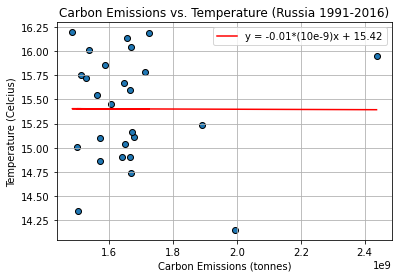

In [19]:
# Russia
lin_regress_small(russia_df.annual_co2_tonnes, russia_df.Temperature_C)
plt.title("Carbon Emissions vs. Temperature (Russia 1991-2016)")
plt.xlabel("Carbon Emissions (tonnes)")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.savefig("output-data/images/russia-regression.png")
plt.show()

The correlation coefficient is 0.41
The r-squared value is 0.17


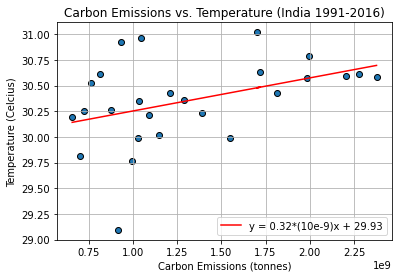

In [20]:
# India
lin_regress_small(india_df.annual_co2_tonnes, india_df.Temperature_C)
plt.title("Carbon Emissions vs. Temperature (India 1991-2016)")
plt.xlabel("Carbon Emissions (tonnes)")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.savefig("output-data/images/india-regression.png")
plt.show()

The correlation coefficient is 0.4
The r-squared value is 0.16


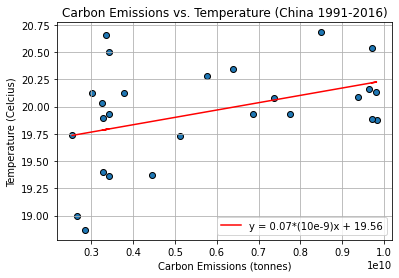

In [21]:
# China
lin_regress_small(china_df.annual_co2_tonnes, china_df.Temperature_C)
plt.title("Carbon Emissions vs. Temperature (China 1991-2016)")
plt.xlabel("Carbon Emissions (tonnes)")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.savefig("output-data/images/china-regression.png")
plt.show()

#### State Emissions vs. Income

In [31]:
#create variables for different value sets 
state_name = us_merge_df["State"].unique()
us_co2_production = us_merge_df["Production, U.S. Share"].astype(float)
median_income = us_merge_df["Median income"].astype(float)
co2_per_capita = us_merge_df["Consumption per Capita, Million Btu"].astype(float)

In [32]:
emissions_vs_income = us_merge_df[["State", "Median income","Production, U.S. Share"]]

The correlation coefficient is -0.17
The r-squared value is 0.03


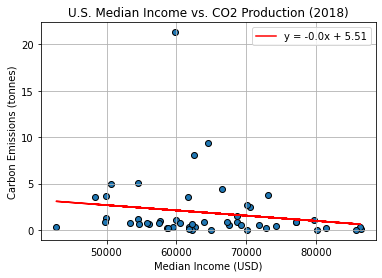

In [33]:
lin_regress(median_income, us_co2_production)
plt.title("U.S. Median Income vs. CO2 Production (2018)")
plt.ylabel("Carbon Emissions (tonnes)")
plt.xlabel("Median Income (USD)")
plt.grid(True)
plt.savefig("output-data/images/us-income-co2-regression.png")
plt.show()


The correlation coefficient is -0.29
The r-squared value is 0.08


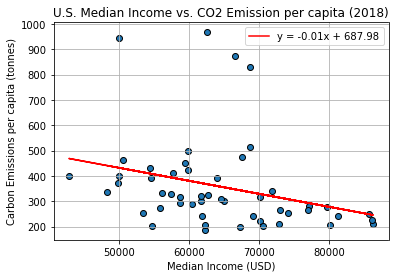

In [34]:
lin_regress(median_income, co2_per_capita)
plt.title("U.S. Median Income vs. CO2 Emission per capita (2018)")
plt.ylabel("Carbon Emissions per capita (tonnes)")
plt.xlabel("Median Income (USD)")
plt.grid(True)
plt.savefig("output-data/images/us-income-co2-percap-regression.png")
plt.show()
